In [1]:
import numpy as np
import pandas as pd
import pickle
import warnings
import time
import re
import gspread
from oauth2client.service_account import ServiceAccountCredentials

#Graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn tools
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#pandas show all columns
pd.set_option('display.max_columns', None)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# define the scope
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

# add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('useless-machine-learning-a9027a9eb367.json', scope)

# authorize the clientsheet 
gc = gspread.authorize(creds)

#Pull data from spreadsheet and conver to DataFrame
spreadsheet_key = '1SQpPGP0RYHR4KcOz4XoPFe5y4Mue9D6ilXaAld2dNrI'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("LCS Player Data")
bp_vals = worksheet.get_all_values()

bp = pd.DataFrame(bp_vals[1:], columns=bp_vals[0])

In [3]:
spring_2020 = bp[(bp['Split'] == 'Spring') & (bp['Year'] == '2020')].reset_index(drop = True)
summer_2020 = bp[(bp['Split'] == 'Summer') & (bp['Year'] == '2020')].reset_index(drop = True)
spring_2021 = bp[(bp['Split'] == 'Spring') & (bp['Year'] == '2021')].reset_index(drop = True)
summer_2021 = bp[(bp['Split'] == 'Summer') & (bp['Year'] == '2021')].reset_index(drop = True)
#spring_2022 = bp[(bp['Split'] == 'Spring') & (bp['Year'] == '2022')].reset_index(drop = True)

In [4]:
#print(len(spring_2021))
#print(len(summer_2021))
#print(len(spring_2022))

In [5]:
lcs_spring_2020 = pd.read_csv('LCS 2020 Spring - Player Stats - OraclesElixir.csv')
lcs_summer_2020 = pd.read_csv('LCS 2020 Summer - Player Stats - OraclesElixir.csv')
lcs_spring_2021 = pd.read_csv('LCS 2021 Spring - Player Stats - OraclesElixir.csv')
lcs_summer_2021 = pd.read_csv('LCS 2021 Summer - Player Stats - OraclesElixir.csv')
#lck_spring_2021 = pd.read_csv('LCK 2021 Spring - Player Stats - OraclesElixir.csv')
#lck_summer_2021 = pd.read_csv('LCK 2021 Summer - Player Stats - OraclesElixir.csv')
#lck_spring_2022 = pd.read_csv('LCK 2022 Spring - Player Stats - OraclesElixir.csv')

In [6]:
#ps_spring_2021 = lcs_spring_2021.append(lck_spring_2021, ignore_index=True)
#ps_summer_2021 = lcs_summer_2021.append(lck_summer_2021, ignore_index=True)

In [7]:
full_spring_2020 = spring_2020.merge(lcs_spring_2020, left_on= ['Name', 'Position'], right_on= ['Player', 'Pos'])
full_summer_2020 = summer_2020.merge(lcs_summer_2020, left_on= ['Name', 'Position'], right_on= ['Player', 'Pos'])
full_spring_2021 = spring_2021.merge(lcs_spring_2021, left_on= ['Name', 'Position'], right_on= ['Player', 'Pos'])
full_summer_2021 = summer_2021.merge(lcs_summer_2021, left_on= ['Name', 'Position'], right_on= ['Player', 'Pos'])
#full_spring_2022 = spring_2022.merge(lck_spring_2022, left_on= ['Name', 'Position'], right_on= ['Player', 'Pos'])

In [8]:
#print(len(full_spring_2021))
#print(len(full_summer_2021))
#print(len(full_spring_2022))

In [9]:
#check1 = spring_2021['Name'].to_list()
#check2 = summer_2021['Name'].to_list()
#check3 = spring_2022['Name'].to_list()
#use1 = full_spring_2021['Name'].to_list()
#use2 = full_summer_2021['Name'].to_list()
#use3 = full_spring_2022['Name'].to_list()

In [10]:
#l = []
#for i in range(0, len(check3)):
#    if check3[i] not in use3: 
#        l.append(check3[i])

In [11]:
total = pd.concat([full_spring_2021, full_summer_2021, full_spring_2020, full_summer_2020], ignore_index=True)

In [12]:
total = total[['Name', 'Split', 'Year', 'Position', 'Rank', 'Player', 'GP', 'W%', 
                  'K', 'D', 'A', 'KDA', 'KP', 'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 
                  'CSPM', 'CS%P15', 'DPM', 'DMG%', 'EGPM', 'GOLD%', 'WPM', 'WCPM']].astype(str)

total['W%'] = total['W%'].str.replace('%', '').astype('float')
total['KS%'] = total['KS%'].str.replace('%', '').astype('float')
total['KP'] = total['KP'].str.replace('%', '').astype('float')
total['DTH%'] = total['DTH%'].str.replace('%', '').astype('float')
total['FB%'] = total['FB%'].str.replace('%', '').astype('float')
total['CS%P15'] = total['CS%P15'].str.replace('%', '').astype('float')
total['DMG%'] = total['DMG%'].str.replace('%', '').astype('float')
total['GOLD%'] = total['GOLD%'].str.replace('%', '').astype('float')

total[['Rank', 'GP', 'W%', 'K', 'D', 'A', 'KDA', 'KP', 'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 
      'CSPM', 'CS%P15', 'DPM', 'DMG%', 'EGPM', 'GOLD%', 'WPM', 'WCPM']] = total[['Rank', 'GP', 'W%', 'K', 'D', 'A', 'KDA', 'KP', 'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 
            'CSPM', 'CS%P15', 'DPM', 'DMG%', 'EGPM', 'GOLD%', 'WPM', 'WCPM']].astype('float')

In [13]:
total['K'] = total['K']/total['GP']
total['A'] = total['A']/total['GP']
total['D'] = total['D']/total['GP']
total.drop('GP', axis = 1, inplace = True)

In [14]:
top = total[total['Position'] == 'Top']
#jg = total[total['Position'] == 'Jungle']
#mid = total[total['Position'] == 'Middle']
#adc = total[total['Position'] == 'ADC']
#sup = total[total['Position'] == 'Support']

features = ['W%', 'K', 'D', 'A', 'KDA', 'KP', 'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 
            'CSPM', 'CS%P15', 'DPM', 'DMG%', 'EGPM', 'GOLD%', 'WPM', 'WCPM']

### Correlation Matrix

In [15]:
regressor = RandomForestRegressor(n_estimators=500)

x_top = top[features].to_numpy()
y_top = top[['Rank']].to_numpy()
y_top = y_top.reshape(y_top.shape[0], )
regressor.fit(x_top, y_top)
top_ind = np.argsort(regressor.feature_importances_)[::-1]
for i in top_ind:
    print(f"{features[i]}: {regressor.feature_importances_[i]:.4f}")

EGPM: 0.5469
CS%P15: 0.0947
XPD10: 0.0547
GD10: 0.0424
CSD10: 0.0344
GOLD%: 0.0279
K: 0.0253
W%: 0.0249
KDA: 0.0227
DMG%: 0.0185
D: 0.0164
KS%: 0.0145
DPM: 0.0126
CSPM: 0.0122
KP: 0.0113
WPM: 0.0101
FB%: 0.0097
A: 0.0089
DTH%: 0.0063
WCPM: 0.0055


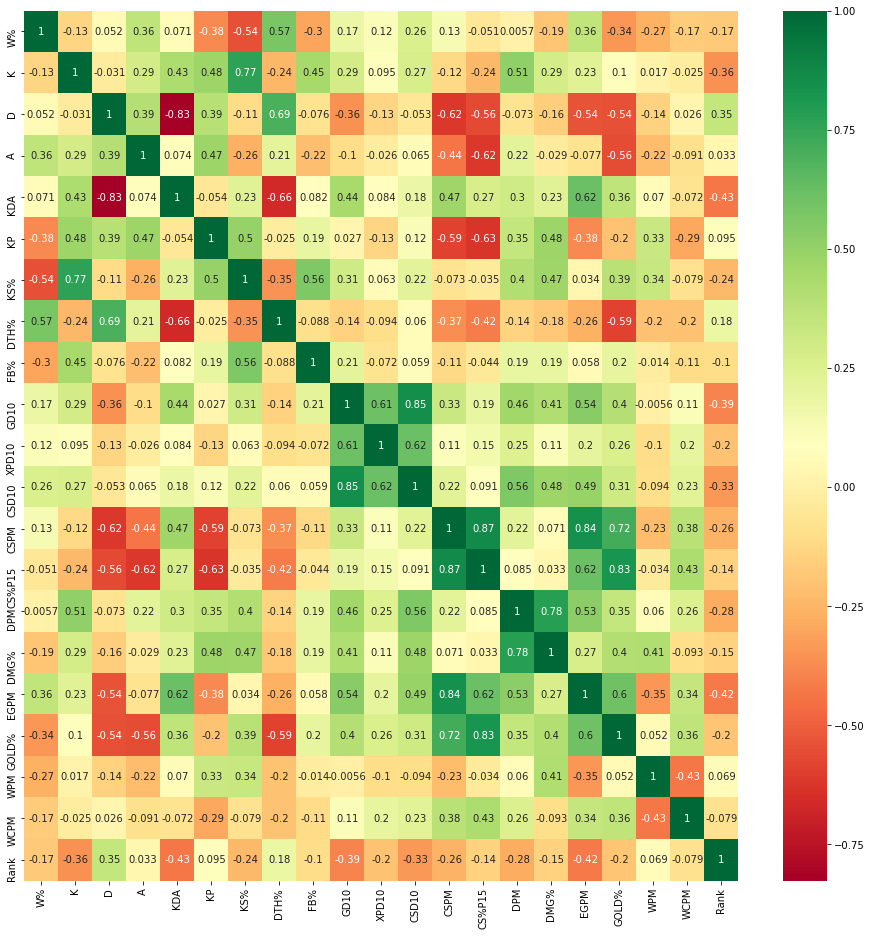

In [16]:
top_corr = top[features + ["Rank"]]

fig = plt.figure(figsize=(16, 16))
fig.set_facecolor('white')
sns.heatmap(top_corr.corr(), annot=True, cmap="RdYlGn")
fig.savefig('top' + '.png')

Remove CS%P15 since it's correlation is 0.87 with CSPM%, which is a more important stat. Also remove GOLD% since it has high correlation with CSPM. Remove CSD10 sine it correlates highly with GD10. Remove DTH% since it is pretty much the same measure as D and KS% since it's so similar ot K. Remove CSPM since it's so similar to EGPM. Remove DPM since it's so similar to both DMG% and KP.

In [17]:
top_features = ['W%', 'K', 'A', 'KP', 'XPD10', 'CSD10', 'EGPM']

In [18]:
means = []
for i in top_features: 
    means.append(top[i].mean())

for j, k in enumerate(top_features): 
    top.loc[:,k] = top[k].apply(lambda x: (x - means[j])/means[j])

### Normalizing and train test splitting data

In [19]:
X_top = top[top_features].values
y_top = top[['Rank']].values

PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X_top)
 
# Generating the standardized values of X
X_top = PredictorScalerFit.transform(X_top)
 
# Split the data into training and testing set
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=42)

### Linear Regression Results

In [20]:
lin_regressor = LinearRegression()  
lin_regressor.fit(X_train_top, y_train_top)
lin_pred = lin_regressor.predict(X_test_top)
df1 = pd.DataFrame({'Actual': y_test_top.flatten(), 'Predicted': lin_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_top, lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_top, lin_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_top, lin_pred)))

Mean Absolute Error: 0.581803084097785
Mean Squared Error: 0.5048463301165517
Root Mean Squared Error: 0.710525390198374


### Decision Tree Results

In [21]:
dec_regressor = DecisionTreeRegressor(random_state = 0)
dec_regressor.fit(X_train_top, y_train_top)
dec_pred = dec_regressor.predict(X_test_top)
df2 = pd.DataFrame({'Actual': y_test_top.flatten(), 'Predicted': dec_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_top, dec_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_top, dec_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_top, dec_pred)))

Mean Absolute Error: 0.5568258440170533
Mean Squared Error: 0.489371165463156
Root Mean Squared Error: 0.6995506882729485


### KNN Results

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=2)
knn_regressor.fit(X_train_top, y_train_top)
knn_pred = knn_regressor.predict(X_test_top)
df3 = pd.DataFrame({'Actual': y_test_top.flatten(), 'Predicted': knn_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_top, knn_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_top, knn_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_top, knn_pred)))

Mean Absolute Error: 0.52046783625731
Mean Squared Error: 0.5672514619883041
Root Mean Squared Error: 0.7531609801286204


### SVR Results

In [23]:
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train_top, y_train_top)
svr_pred = svr_regressor.predict(X_test_top)
df4 = pd.DataFrame({'Actual': y_test_top.flatten(), 'Predicted': svr_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_top, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_top, svr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_top, svr_pred)))

Mean Absolute Error: 0.5512991779587876
Mean Squared Error: 0.591262241503962
Root Mean Squared Error: 0.7689357850327698


### ANN Results

In [24]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim= len(top_features), kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train_top, y_train_top, batch_size = 10, epochs = 50, verbose=1)

Epoch 1/50
40/40 [==============================] - 1s 1ms/step - loss: 4.4811
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 4.1153
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 3.4055
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 2.4190
Epoch 5/50
40/40 [==============================] - 0s 910us/step - loss: 1.5579
Epoch 6/50
40/40 [==============================] - 0s 893us/step - loss: 1.0212
Epoch 7/50
40/40 [==============================] - 0s 849us/step - loss: 0.7394
Epoch 8/50
40/40 [==============================] - 0s 867us/step - loss: 0.6071
Epoch 9/50
40/40 [==============================] - 0s 866us/step - loss: 0.5460
Epoch 10/50
40/40 [==============================] - 0s 928us/step - loss: 0.5174
Epoch 11/50
40/40 [==============================] - 0s 939us/step - loss: 0.4996
Epoch 12/50
40/40 [==============================] - 0s 914us/step - loss: 0.4883
Epoch 13/50
40/40 [==============

In [25]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns = ['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer = 'normal'))
 
            # Compiling the model
            model.compile(loss = 'mean_squared_error', optimizer = 'adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test - model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:', epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial), 100-MAPE]],
                                                                    columns = ['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 

In [26]:
ResultsData = FunctionFindBestParams(X_train_top, y_train_top, X_test_top, y_test_top)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 61.3903916137725
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 62.52835645080775
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 62.08723825320863
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 63.04611820458902
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 47.896944265268004
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 63.45718105634054
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 62.51455329315007
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 63.44333914985434
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 19.040875449108583
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 61.52791983900014
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 61.93098867381061
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 62.47333569368656
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 20.933344517244464
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 61.265648567420925
15 Parameters: ba

<AxesSubplot:xlabel='Parameters'>

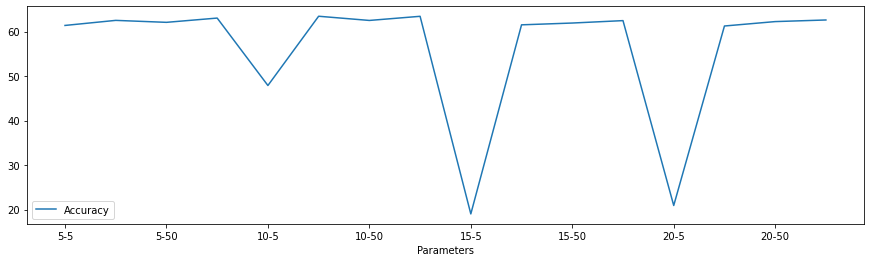

In [27]:
%matplotlib inline
ResultsData.plot(x = 'Parameters', y = 'Accuracy', figsize=(15,4), kind = 'line')

Batch size 10 and epochs = 10 results in the best accuracy

In [28]:
# Fitting the ANN to the Training set
model.fit(X_train_top, y_train_top ,batch_size = 10, epochs = 10, verbose=0)

# Generating Predictions on testing data
ann_pred = model.predict(X_test_top)

# Scaling the test data back to original scale
Test_Data = PredictorScalerFit.inverse_transform(X_test_top)

TestingData = pd.DataFrame(data = Test_Data, columns = top_features)
TestingData['Rank'] = y_test_top
TestingData['Predicted Rank'] = ann_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_top, ann_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_top, ann_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_top, ann_pred)))

Mean Absolute Error: 0.5772743057786373
Mean Squared Error: 0.47195522546082197
Root Mean Squared Error: 0.6869899747891682


### Comparing Model Predictions

In [29]:
lcs_spring_2022 = pd.read_csv('LCS 2022 Spring - Player Stats - OraclesElixir.csv')

top_lcs_2022 = lcs_spring_2022[(lcs_spring_2022['Pos'] == 'Top') & (lcs_spring_2022['GP'] >= 12)]

top_lcs_2022 = top_lcs_2022[['Player', 'Pos', 'GP', 'W%', 'CTR%', 'K', 'D', 'A', 'KDA', 'KP',
       'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 'CSPM', 'CS%P15', 'DPM',
       'DMG%', 'D%P15', 'EGPM', 'GOLD%', 'WPM', 'WCPM']].astype(str)

top_lcs_2022['W%'] = top_lcs_2022['W%'].str.replace('%', '').astype('float')
top_lcs_2022['KS%'] = top_lcs_2022['KS%'].str.replace('%', '').astype('float')
top_lcs_2022['KP'] = top_lcs_2022['KP'].str.replace('%', '').astype('float')
top_lcs_2022['DTH%'] = top_lcs_2022['DTH%'].str.replace('%', '').astype('float')
top_lcs_2022['FB%'] = top_lcs_2022['FB%'].str.replace('%', '').astype('float')
top_lcs_2022['CS%P15'] = top_lcs_2022['CS%P15'].str.replace('%', '').astype('float')
top_lcs_2022['DMG%'] = top_lcs_2022['DMG%'].str.replace('%', '').astype('float')
top_lcs_2022['GOLD%'] = top_lcs_2022['GOLD%'].str.replace('%', '').astype('float')

top_lcs_2022[['GP', 'W%', 'K', 'D', 'A', 'KDA', 'KP', 'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 
      'CSPM', 'CS%P15', 'DPM', 'DMG%', 'EGPM', 'GOLD%', 'WPM', 'WCPM']] = top_lcs_2022[['GP', 'W%', 'K', 'D', 'A', 'KDA', 'KP', 'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 
            'CSPM', 'CS%P15', 'DPM', 'DMG%', 'EGPM', 'GOLD%', 'WPM', 'WCPM']].astype('float')

top_lcs_2022['K'] = top_lcs_2022['K']/top_lcs_2022['GP']
top_lcs_2022['A'] = top_lcs_2022['A']/top_lcs_2022['GP']
top_lcs_2022['D'] = top_lcs_2022['D']/top_lcs_2022['GP']
top_lcs_2022.drop('GP', axis = 1, inplace = True)

means = []
for i in top_features: 
    means.append(top_lcs_2022[i].mean())

for j, k in enumerate(top_features): 
    top_lcs_2022.loc[:,k] = top_lcs_2022[k].apply(lambda x: (x - means[j])/means[j])

X_top_lcs_sp2022 = top_lcs_2022[top_features].values
top_lcs_sp2022_names = top_lcs_2022['Player']

PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X_top_lcs_sp2022)
 
# Generating the standardized values of X
X_top_lcs_sp2022 = PredictorScalerFit.transform(X_top_lcs_sp2022)

top_lin = lin_regressor.predict(X_top_lcs_sp2022)
top_dec = dec_regressor.predict(X_top_lcs_sp2022)
top_knn = knn_regressor.predict(X_top_lcs_sp2022)
top_svr = svr_regressor.predict(X_top_lcs_sp2022)
top_ann = model.predict(X_top_lcs_sp2022)

In [30]:
top_lin = pd.DataFrame(top_lin)
top_lin.rename(columns={0:'Rank'}, inplace= True)
top_names = top_lcs_2022[['Player']].reset_index(drop = True)
top_final_lin = pd.concat([top_names, top_lin], axis=1)
top_final_lin.sort_values(by='Rank', ascending=True, inplace=True)
top_final_lin.reset_index(drop=True, inplace = True)

initial = 1
for i in range(0, len(top_final_lin)):
    top_final_lin.loc[i, 'Rank'] = initial
    initial += 1

top_final_lin

,Player,Rank
0,Summit,1.0
1,Bwipo,2.0
2,Ssumday,3.0
3,Impact,4.0
4,Jenkins,5.0
5,Licorice,6.0
6,Revenge,7.0
7,FakeGod,8.0
8,Huni,9.0
9,Kumo,10.0


In [31]:
top_dec = pd.DataFrame(top_dec)
top_dec.rename(columns={0:'Rank'}, inplace= True)
top_names = top_lcs_2022[['Player']].reset_index(drop = True)
top_final_dec = pd.concat([top_names, top_dec], axis=1)
top_final_dec.sort_values(by='Rank', ascending=True, inplace=True)
top_final_dec.reset_index(drop=True, inplace = True)

initial = 1
for i in range(0, len(top_final_dec)):
    top_final_dec.loc[i, 'Rank'] = initial
    initial += 1

top_final_dec

,Player,Rank
0,Summit,1.0
1,Bwipo,2.0
2,Ssumday,3.0
3,Licorice,4.0
4,FakeGod,5.0
5,Revenge,6.0
6,Huni,7.0
7,Jenkins,8.0
8,Impact,9.0
9,Kumo,10.0


In [32]:
top_knn = pd.DataFrame(top_knn)
top_knn.rename(columns={0:'Rank'}, inplace= True)
top_names = top_lcs_2022[['Player']].reset_index(drop = True)
top_final_knn = pd.concat([top_names, top_knn], axis=1)
top_final_knn.sort_values(by='Rank', ascending=True, inplace=True)
top_final_knn.reset_index(drop=True, inplace = True)

initial = 1
for i in range(0, len(top_final_knn)):
    top_final_knn.loc[i, 'Rank'] = initial
    initial += 1

top_final_knn

,Player,Rank
0,Bwipo,1.0
1,Jenkins,2.0
2,Ssumday,3.0
3,Summit,4.0
4,Huni,5.0
5,Kumo,6.0
6,Revenge,7.0
7,FakeGod,8.0
8,Licorice,9.0
9,Impact,10.0


In [33]:
top_svr = pd.DataFrame(top_svr)
top_svr.rename(columns={0:'Rank'}, inplace= True)
top_names = top_lcs_2022[['Player']].reset_index(drop = True)
top_final_svr = pd.concat([top_names, top_svr], axis=1)
top_final_svr.sort_values(by='Rank', ascending=True, inplace=True)
top_final_svr.reset_index(drop=True, inplace = True)

initial = 1
for i in range(0, len(top_final_svr)):
    top_final_svr.loc[i, 'Rank'] = initial
    initial += 1

top_final_svr

,Player,Rank
0,Summit,1.0
1,Ssumday,2.0
2,Bwipo,3.0
3,Jenkins,4.0
4,Revenge,5.0
5,Licorice,6.0
6,FakeGod,7.0
7,Huni,8.0
8,Impact,9.0
9,Kumo,10.0


In [34]:
top_ann = pd.DataFrame(top_ann)
top_ann.rename(columns={0:'Rank'}, inplace= True)
top_names = top_lcs_2022[['Player']].reset_index(drop = True)
top_final_ann = pd.concat([top_names, top_ann], axis=1)
top_final_ann.sort_values(by='Rank', ascending=True, inplace=True)
top_final_ann.reset_index(drop=True, inplace = True)

initial = 1
for i in range(0, len(top_final_ann)):
    top_final_ann.loc[i, 'Rank'] = initial
    initial += 1

top_final_ann

,Player,Rank
0,Summit,1.0
1,Ssumday,2.0
2,Bwipo,3.0
3,Jenkins,4.0
4,Licorice,5.0
5,Revenge,6.0
6,Impact,7.0
7,FakeGod,8.0
8,Huni,9.0
9,Kumo,10.0


All models outside of KNN seem reasonable.

### Combined Results Ensemble Averaging

In [35]:
all_pred = (1/4*ann_pred + 1/4*dec_pred.reshape(-1,1) + 1/4*svr_pred.reshape(-1,1) + 1/4*lin_pred.reshape(-1,1))

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_top, all_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_top, all_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_top, all_pred)))

Mean Absolute Error: 0.5659809795185549
Mean Squared Error: 0.4828459111911461
Root Mean Squared Error: 0.6948711471856823


### Predicting for the Spring 2022 LCS Players

In [39]:
final = pd.merge(pd.merge(pd.merge(top_final_lin, top_final_ann, on = 'Player'), top_final_svr, on = 'Player'), top_final_dec, on = 'Player')
final['Final Rank'] = final.iloc[:].sum(axis = 1)/4
final.sort_values(by = 'Final Rank', ascending = True, inplace = True)
final

,Player,Rank_x,Rank_y,Rank_x,Rank_y,Final Rank
0,Summit,1.0,1.0,1.0,1.0,1.00
1,Bwipo,2.0,3.0,3.0,2.0,2.50
2,Ssumday,3.0,2.0,2.0,3.0,2.50
4,Jenkins,5.0,4.0,4.0,8.0,5.25
5,Licorice,6.0,5.0,6.0,4.0,5.25
6,Revenge,7.0,6.0,5.0,6.0,6.00
7,FakeGod,8.0,8.0,7.0,5.0,7.00
3,Impact,4.0,7.0,9.0,9.0,7.25
8,Huni,9.0,9.0,8.0,7.0,8.25
9,Kumo,10.0,10.0,10.0,10.0,10.00
